<a href="https://colab.research.google.com/github/hanifro/Dataset-dan-Materi-Orbit/blob/main/Copy_of_Latihan_statistical_test_%26_dimensionality_reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1) Contoh Kasus Uji Beda
Sebuah lembaga pelatihan bahasa inggris ingin mengetahui apakah pelatihan mereka berhasil meningkatkan skor TOEFL pesertanya. Mereka lalu menganalisa skor TOEFL sebelum dan sesudah pelatihan. Dengan tingkat kepercayaan 95%, apakah pelatihan ini berhasil?

![alt text](https://drive.google.com/uc?id=1QN1HbirK1jx5hwlFVEGJUHM64GNjuS1p)




In [ ]:
#Library
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt
%matplotlib inline  

Membuat hipotesis

Ho : Nilai TOEFL sesudah pelatihan <= sebelum pelatihan

Ha : Nilai TOEFL sesudah pelatihan > sebelum pelatihan

In [1]:
toefl = pd.read_csv('https://raw.githubusercontent.com/hanifro/Dataset-dan-Materi-Orbit/main/skor_toefl.csv')
toefl

NameError: ignored

Menentukan uji statistik

![alt text](https://drive.google.com/uc?id=1asHY6TCNsltT7O8H6CmlEqQxQPgKH-6d)

Meski datanya ada 2, namun masih dari orang yang sama sehingga termasuk uji beda 2 kelompok berhubungan. Datanya numerik dan jumlahnya juga cukup banyak sehingga menurut teorema limit pusat yang dibahas minggu lalu, distribusi datanya mendekati normal. Menurut tabel diatas, uji statistik yang sesuai adalah "paired sample t-test". Di python uji ini tersedia di scipy.stats dengan nama "ttest_rel"

In [ ]:
#Melakukan uji t
uji_t = stats.ttest_rel(toefl['Sesudah'], toefl['Sebelum']) #hasilnya: (statistik hitungnya (t-hitung), pvalue)
print('nilai t-hitung = ', uji_t[0])
print('nilai p-value = ', uji_t[1])

nilai t-hitung =  30.255038012916643
nilai p-value =  1.638101871655264e-51


Berdasarkan hasil diatas, p-value = 1,6 x 10^(-51) < alpha (5%). Maka Ho ditolak, terdapat peningkatan yang signifikan dari TOEFL bahasa Inggris peserta pelatihan

# 2) Contoh dimensionality reduction (Latihan untuk student)
Pada latihan ini kita akan mengklasifikasi data genre musik. Disini kita akan membuat beberapa model KNN dengan menggunakan data asli dan data yang dimensinya sudah direduksi. Tugas kalian adalah membandingkan akurasi dan lama training antara data asli dan data yang sudah direduksi.

In [2]:
music = pd.read_csv('https://raw.githubusercontent.com/hanifro/Dataset-dan-Materi-Orbit/main/music_genre.csv')
music2 = music.copy()
music2.dropna(inplace=True)
del music2['Artist Name']
del music2['Track Name']
music2

NameError: ignored

In [ ]:
#Memisahkan Feature dan Label
#Feature
X = music2.iloc[:,:14].values
Y = music2.iloc[:, 14].values

In [ ]:
scaler = StandardScaler()

# transform data
X_scaled = scaler.fit_transform(X)
print(X_scaled)

[[ 0.6578634  -0.86108     0.59301271 ... -0.22000411  0.33481231
   0.22582345]
 [-0.48893955 -0.54783734 -0.2323635  ...  0.8410691  -0.89146753
   0.22582345]
 [ 0.59750535 -2.15621793  1.25744056 ...  2.5868942   0.14687296
   0.22582345]
 ...
 [-0.5492976   0.19912594  1.28220184 ... -0.6092036   0.02828982
   0.22582345]
 [-0.85108785 -1.86707086  0.55587078 ...  0.28659404  0.05825067
   0.22582345]
 [-0.00607515 -0.75264985  0.75396107 ...  0.51558089 -0.26514691
   0.22582345]]


## Feature Selection dengan uji statistik
Disini kita akan memilih beberapa feature saja yang dianggap penting untuk nantinya digunakan untuk membuat model. Berbeda dengan PCA dan LDA, kita tidak mentransformasi data, hanya menggunakan sebagiannya saja. 

Karena labelnya kategorik, maka kita bisa menggunakan uji beda. Karena datanya banyak dan jumlah grupnya lebih dari 2, maka disini kita menggunakan ANOVA. Berikut contoh kodingan untuk feature selection dengan uji statistik yang tersedia di library 'sklearn.feature_selection'

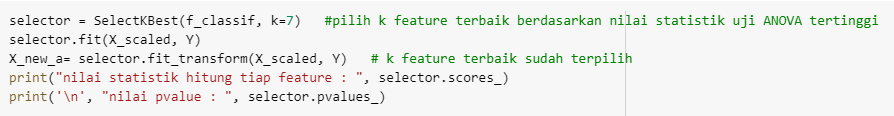

In [ ]:
#Ketik kodingannya disini, silahkan memilih berapa k feature yang mau digunakan
selector = SelectKBest(f_classif, k=7) # K feature terbaik berdasarkan nilai statistik uji ANOVA tertinggi
selector.fit(X_scaled, Y)
X_new_a = selector.fit_transform(X_scaled, Y)
print("nilai statistik hitung tiap feature : ", selector.scores_)
print("\n", "nilai pvalue : ", selector.pvalues_)

nilai statistik hitung tiap feature :  [139.88066056 327.57607032 607.05627169   3.44940318 533.23015937
  17.36126483 240.43782283 702.69800751 307.34168538  25.06319532
 208.2249501   28.89657946 931.21961423  25.14183356]

 nilai pvalue :  [5.67588919e-278 0.00000000e+000 0.00000000e+000 1.54594261e-004
 0.00000000e+000 8.80419429e-032 0.00000000e+000 0.00000000e+000
 0.00000000e+000 1.36713016e-047 0.00000000e+000 1.72827268e-055
 0.00000000e+000 9.41651367e-048]


## PCA
Sebelum menentukan ingin mereduksi menjadi berapa komponen, kita bikin dulu visualisasi cumulative explained ratio sebagai gambaran berapa persen varians data asli yang tetap bisa dijelaskan meski sudah direduksi

Text(0, 0.5, 'cumulative explained variance')

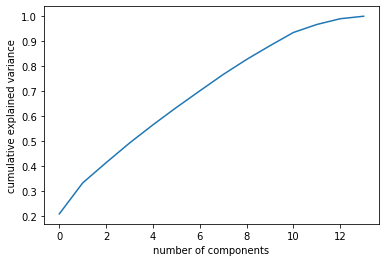

In [ ]:
#Ketik kodingan disini
pca = PCA()
pca_data = pca.fit_transform(X_scaled)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("number of components")
plt.ylabel("cumulative explained variance")

In [ ]:
# Ketik kodingannya disini
n = 1
pca = PCA(n_components=n)
X_new_pca = pca.fit_transform(X_scaled)
total_var = pca.explained_variance_.sum()*100
print(total_var, '% of total variance is explained by', n, 'principal components')

292.5159229792802 % of total variance is explained by 1 principal components


Text(0, 0.5, 'cumulative explained variance')

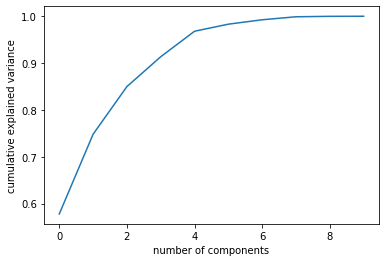

In [ ]:
#Ketik kodingannya disini
lda = LinearDiscriminantAnalysis()
lda_data = lda.fit_transform(X_scaled, Y)

plt.plot(np.cumsum(lda.explained_variance_ratio_))
plt.xlabel("number of components")
plt.ylabel("cumulative explained variance")

In [ ]:
#Ketik kodingannya disini
l = 4
lda = LinearDiscriminantAnalysis(n_components=l)
X_new_lda = lda.fit_transform(X_scaled, Y)
total_var = lda.explained_variance_ratio_.sum()*100
print(total_var, "% of total variance is explained by", l, 'features')

91.36003363150664 % of total variance is explained by 4 features


#Model KNN
Buat model knn dari data asli dan data yang sudah dilakukan dimensional reduction

Evaluasi berdasarkan akurasi dan juga lama training hingga membuat prediksi. Berikut ada contoh menghitung waktu dengan library 'time'

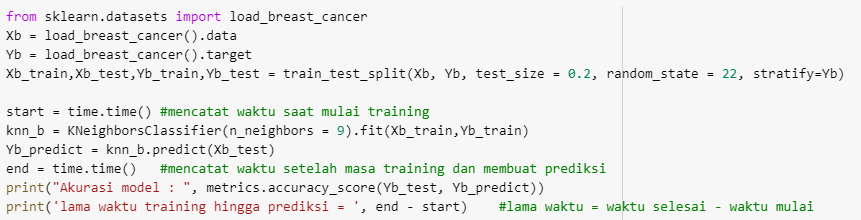

Kodingan diatas hanya contoh, tidak untuk diketik ulang. Nah silahkan memulai proses training data dengan knn

In [ ]:
#Training dan Testing data asli dan data dengan feature selection

# Raw
x_train_raw, x_test_raw, y_train_raw, y_test_raw = train_test_split(X, Y, test_size=0.3, random_state=42)

# Feature Selection
x_train_fs, x_test_fs, y_train_fs, y_test_fs = train_test_split(X_new_a, Y, test_size=0.3, random_state=42)

# PCA
x_train_pca, x_test_pca, y_train_pca, y_test_pca = train_test_split(X_new_pca, Y, test_size=0.3, random_state=42)

# LCA
x_train_lda, x_test_lda, y_train_lda, y_test_lda = train_test_split(X_new_lda, Y, test_size=0.3, random_state=42)

Maximum accuracy:- 0.32674943566591425 at K = 45


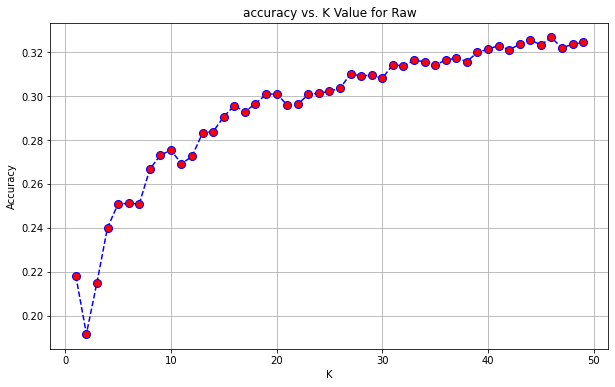

In [ ]:
acc = []
# Will take some time
from sklearn import metrics
for i in range(1,50):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(x_train_raw,y_train_raw)
    yhat = neigh.predict(x_test_raw)
    acc.append(metrics.accuracy_score(y_test_raw, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,50),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=8)
plt.title('accuracy vs. K Value for Raw')
plt.grid(True)
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

Maximum accuracy:- 0.445823927765237 at K = 40


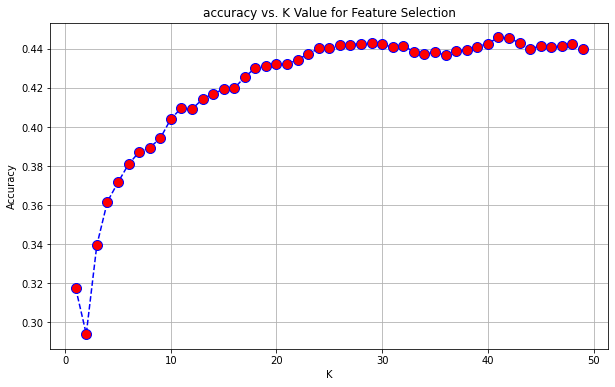

In [ ]:
acc = []
# Will take some time
from sklearn import metrics
for i in range(1,50):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(x_train_fs,y_train_fs)
    yhat = neigh.predict(x_test_fs)
    acc.append(metrics.accuracy_score(y_test_fs, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,50),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value for Feature Selection')
plt.grid(True)
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

Maximum accuracy:- 0.3002257336343115 at K = 46


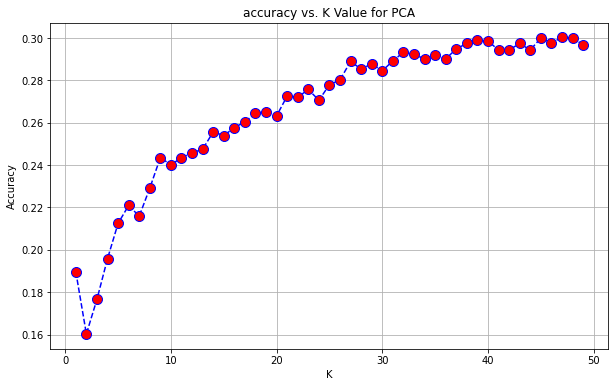

In [ ]:
acc = []
# Will take some time
from sklearn import metrics
for i in range(1,50):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(x_train_pca,y_train_pca)
    yhat = neigh.predict(x_test_pca)
    acc.append(metrics.accuracy_score(y_test_pca, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,50),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value for PCA')
plt.grid(True)
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

Maximum accuracy:- 0.44469525959367945 at K = 38


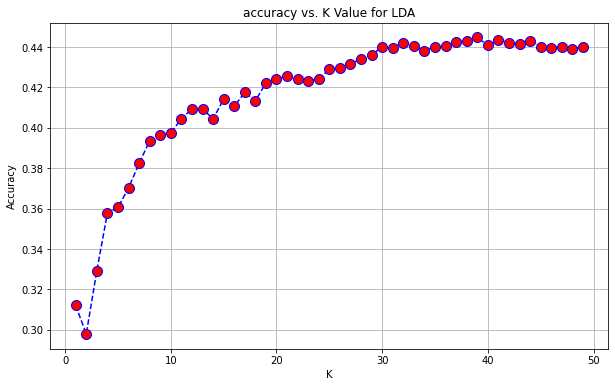

In [ ]:
acc = []
# Will take some time
from sklearn import metrics
for i in range(1,50):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(x_train_lda,y_train_lda)
    yhat = neigh.predict(x_test_lda)
    acc.append(metrics.accuracy_score(y_test_lda, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,50),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value for LDA')
plt.grid(True)
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

In [ ]:
n=92
knn = KNeighborsClassifier(n_neighbors=n)

#Train Model and Predict menggunakan data asli
model_raw = knn.fit(x_train_raw, y_train_raw)
pred_raw = model_raw.predict(x_test_raw)
print("Akurasi model data asli : ", metrics.accuracy_score(y_test_raw, pred_raw))

Akurasi model data asli :  0.3275959367945824


In [ ]:
#Train Model and Predict menggunakan data dengan feature selection
model_fs = knn.fit(x_train_fs, y_train_fs)
pred_fs = model_fs.predict(x_test_fs)
print("Akurasi model data feature selectiion : ", metrics.accuracy_score(y_test_fs, pred_fs))

Akurasi model data feature selectiion :  0.43961625282167044


In [ ]:
#Train Model and Predict menggunakan data dengan PCA
model_pca = knn.fit(x_train_pca, y_train_pca)
pred_pca = model_pca.predict(x_test_pca)
print("Akurasi model data pca : ", metrics.accuracy_score(y_test_pca, pred_pca))

Akurasi model data pca :  0.30840857787810383


In [ ]:
#Train Model and Predict menggunakan data dengan LDA
model_lda = knn.fit(x_train_lda, y_train_lda)
pred_lda = model_lda.predict(x_test_lda)
print("Akurasi model data lda : ", metrics.accuracy_score(y_test_lda, pred_lda))

Akurasi model data lda :  0.4376410835214447


Apa yang dapat kamu simpulkan dari akurasi dan lama waktu training dari data sebelum dan sesudah dimensionality reduction?